# RH IC Final Analysis Part I-Qs 7-10

# Table of Contents
This notebook is in reference to: 

Staring new notebook, importing libraries and final df

Defining and creating a path and importing and then double checking imported final project data set

Running stats on customer profiles of family status and income brackets

Taking a look and comparing differences, if any, of results of customer profile expenditures and frequency

Comparing customer profiles with regions and departments

Creating customer profile visualizations and making comparisons:






In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
#Establishing a path to import the project data set
path = r'/Users/renataherrera/Documents/CF RH 2023-2024/CF DATA IMMERSION/CF RH A4 PYTHON/RH_PYTHON_Instacart Basket Analysis'

In [4]:
#Checking path
path

'/Users/renataherrera/Documents/CF RH 2023-2024/CF DATA IMMERSION/CF RH A4 PYTHON/RH_PYTHON_Instacart Basket Analysis'

In [5]:
#Importing final customer profile.pkl data set as a df
final_customer= pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'final_customer_profile_family_status_depts.pkl'))

In [6]:
#double checking the imported df
final_customer.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_previous_order,product_id,add_to_cart_order,reordered,...,Customer_Activity,exclusion_flag,department,age_group,dependents_group,income_group,profile_fam_age_deps,profile_income,busiest_period_week,busiest_period_day
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,Active,active customer,beverages,18-39 years of age,with dependents,lower income,married young aged 18-39 with dependents,lower income married young aged 18-39 with dep...,Week day,Morning hours
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,Active,active customer,beverages,18-39 years of age,with dependents,lower income,married young aged 18-39 with dependents,lower income married young aged 18-39 with dep...,Week day,Morning hours
2,473747,1,prior,3,3,12,21.0,196,1,1,...,Active,active customer,beverages,18-39 years of age,with dependents,lower income,married young aged 18-39 with dependents,lower income married young aged 18-39 with dep...,Week day,Morning hours
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,Active,active customer,beverages,18-39 years of age,with dependents,lower income,married young aged 18-39 with dependents,lower income married young aged 18-39 with dep...,Week day,Morning hours
4,431534,1,prior,5,4,15,28.0,196,1,1,...,Active,active customer,beverages,18-39 years of age,with dependents,lower income,married young aged 18-39 with dependents,lower income married young aged 18-39 with dep...,Week day,Afternoon hours


In [7]:
# checking shape and dimensions (columns and rows) of import
final_customer.shape

(30992664, 43)

In [8]:
# checking the columns
final_customer.columns

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_previous_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', '_merge', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'avg_price', 'spending_flag', 'median_previous_order',
       'order_frequency_flag', 'gender', 'state', 'age', 'date_joined',
       'n_dependants', 'fam_status', 'income', 'region', 'Customer_Activity',
       'exclusion_flag', 'department', 'age_group', 'dependents_group',
       'income_group', 'profile_fam_age_deps', 'profile_income',
       'busiest_period_week', 'busiest_period_day'],
      dtype='object')

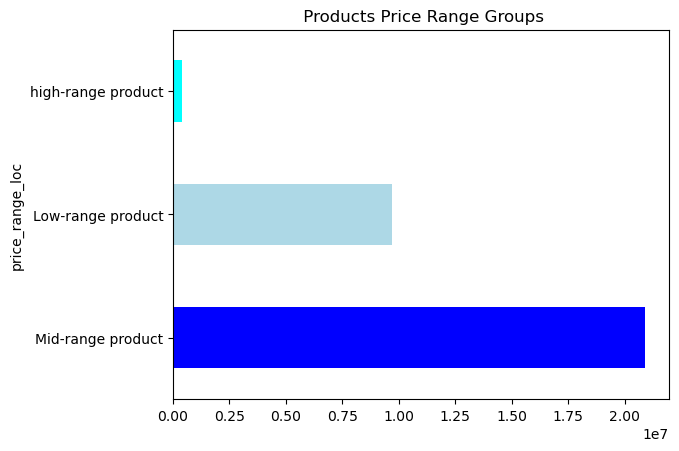

In [55]:
price_range = final_customer['price_range_loc'].value_counts().plot.barh(color = ['blue', 'lightblue', 'cyan'], title = ' Products Price Range Groups')

# 7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [9]:
#aggregating ages
age_group_agg=final_customer.groupby('age_group')[['days_since_previous_order', 'prices']].agg(['min','max', 'mean'])

In [10]:
#checcking
age_group_agg

days_since_previous_order                  prices           \
                                         min   max       mean    min      max   
age_group                                                                       
18-39 years of age                       0.0  30.0  10.811221    1.0  99999.0   
40-59 years of age                       0.0  30.0  10.819718    1.0  99999.0   
60-81 years of age                       0.0  30.0  10.800991    1.0  99999.0   

                               
                         mean  
age_group                      
18-39 years of age  12.056513  
40-59 years of age  12.027717  
60-81 years of age  11.725665

In [11]:
#aggregating incomes
income_group_agg=final_customer.groupby('income_group')[['days_since_previous_order', 'prices']].agg(['min', 'max', 'mean'])

In [12]:
#checkign
income_group_agg

days_since_previous_order                  prices           \
                                    min   max       mean    min      max   
income_group                                                               
higher income                       0.0  30.0  10.684286    1.0  99999.0   
lower income                        0.0  30.0  11.175710    1.0     25.0   
middle income                       0.0  30.0  10.779563    1.0  99999.0   

                          
                    mean  
income_group              
higher income  32.598448  
lower income    6.713149  
middle income   9.279978

In [13]:
#aggregating dependents
dependents_group_agg=final_customer.groupby('dependents_group')[['days_since_previous_order', 'prices']].agg(['min', 'max', 'mean'])

In [14]:
#checking
dependents_group_agg

days_since_previous_order                  prices           \
                                         min   max       mean    min      max   
dependents_group                                                                
with dependents                          0.0  30.0  10.816612    1.0  99999.0   
without dependents                       0.0  30.0  10.791750    1.0  99999.0   

                               
                         mean  
dependents_group               
with dependents     11.878163  
without dependents  12.103485

In [15]:
#Running columns
final_customer.columns

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_previous_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', '_merge', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'avg_price', 'spending_flag', 'median_previous_order',
       'order_frequency_flag', 'gender', 'state', 'age', 'date_joined',
       'n_dependants', 'fam_status', 'income', 'region', 'Customer_Activity',
       'exclusion_flag', 'department', 'age_group', 'dependents_group',
       'income_group', 'profile_fam_age_deps', 'profile_income',
       'busiest_period_week', 'busiest_period_day'],
      dtype='object')

In [16]:
#agging income group
income_group_agg=final_customer.groupby('income_group')[['days_since_previous_order', 'prices']].agg(['min', 'max', 'mean'])

In [17]:
# agging stats on profile family age deps status and income combined
final_customer.groupby('profile_fam_age_deps').agg({'income': ['mean', 'median', 'min', 'max']})


income                   \
                                                     mean    median    min   
profile_fam_age_deps                                                         
married aged 40-59 with dependents          113529.987578  114064.0  26154   
married older aged 60-81 with dependents    115969.573035  116194.0  29001   
married young aged 18-39 with dependents     70653.706154   69071.0  25911   
single aged 40-59 without dependents        114579.820431  114646.0  27431   
single older aged 60-81 without dependents  115968.492235  116145.0  29011   
single young aged 18-39 with dependents      70869.087935   69977.0  25937   
single young aged 18-39 without dependents   70479.661251   68741.0  25903   

                                                    
                                               max  
profile_fam_age_deps                                
married aged 40-59 with dependents          592409  
married older aged 60-81 with dependents    593901  
married young aged 18-39 with dependents    397929  
single aged 40-59 without dependents        584097  
single older aged 60-81 without dependents  578251  
single young aged 18-39 with dependents     396364  
single young aged 18-39 without dependents  387860

In [18]:
# agging stats on profile family status & income combined
final_customer.groupby('profile_income').agg({'income': ['mean', 'median', 'min', 'max']})


income            \
                                                             mean    median   
profile_income                                                                
higher income married aged 40-59 with dependents    168905.259213  160824.0   
higher income married older aged 60-81 with dep...  169317.185891  160770.0   
higher income married young aged 18-39 with dep...  221307.459967  183111.0   
higher income single aged 40-59 without dependents  170838.511903  161272.0   
higher income single older aged 60-81 without d...  167124.910266  160624.0   
higher income single young aged 18-39 without d...  236512.025772  194184.0   
higher income young aged 18-39 with dependents      203321.492085  181989.0   
lower income married aged 40-59 with dependents      39965.408386   40181.0   
lower income married older aged 60-81 with depe...   39858.040554   39812.0   
lower income married young aged 18-39 with depe...   39676.289391   41050.0   
lower income single aged 40-59 without dependents    39515.997328   39270.0   
lower income single older aged 60-81 without de...   39951.256604   39643.0   
lower income single young aged 18-39 without de...   39953.667596   41658.0   
lower income young aged 18-39 with dependents        39816.323356   41615.0   
middle income married aged 40-59 with dependents    108450.867797  109854.0   
middle income married older aged 60-81 with dep...  110892.683561  112063.0   
middle income married young aged 18-39 with dep...   74601.923667   72890.0   
middle income single aged 40-59 without dependents  108884.317696  110143.0   
middle income single older aged 60-81 without d...  110608.861761  111417.0   
middle income single young aged 18-39 without d...   74590.757659   72653.0   
middle income young aged 18-39 with dependents       74778.474488   73191.0   

                                                                    
                                                       min     max  
profile_income                                                      
higher income married aged 40-59 with dependents    150000  592409  
higher income married older aged 60-81 with dep...  150007  593901  
higher income married young aged 18-39 with dep...  150352  397929  
higher income single aged 40-59 without dependents  150000  584097  
higher income single older aged 60-81 without d...  150002  578251  
higher income single young aged 18-39 without d...  150788  387860  
higher income young aged 18-39 with dependents      151708  396364  
lower income married aged 40-59 with dependents      26154   49998  
lower income married older aged 60-81 with depe...   29001   49991  
lower income married young aged 18-39 with depe...   25911   49998  
lower income single aged 40-59 without dependents    27431   49986  
lower income single older aged 60-81 without de...   29011   49991  
lower income single young aged 18-39 without de...   25903   49992  
lower income young aged 18-39 with dependents        25937   49981  
middle income married aged 40-59 with dependents     50001  149987  
middle income married older aged 60-81 with dep...   50005  149999  
middle income married young aged 18-39 with dep...   50002  149343  
middle income single aged 40-59 without dependents   50011  149985  
middle income single older aged 60-81 without d...   50006  149999  
middle income single young aged 18-39 without d...   50002  149514  
middle income young aged 18-39 with dependents       50044  149785

Results: In the customer profiles with higher incomes this gives a clear indication that they have greater purchasing power, and further, generate outliers in this higher income group, most likely related with highest salaries. Correspondingly, on average, lower incomes customer profiles correlate with the least orders.

In [19]:
#agging expenditure stats on profile family status & prices combined
final_customer.groupby('profile_fam_age_deps').agg({'prices': ['mean', 'median', 'min', 'max']})

prices                     
                                                 mean median  min      max
profile_fam_age_deps                                                      
married aged 40-59 with dependents          11.727017    7.4  1.0  99999.0
married older aged 60-81 with dependents    11.789539    7.4  1.0  99999.0
married young aged 18-39 with dependents    12.378674    7.4  1.0  99999.0
single aged 40-59 without dependents        12.928433    7.4  1.0  99999.0
single older aged 60-81 without dependents  11.534215    7.4  1.0  99999.0
single young aged 18-39 with dependents     10.892382    7.4  1.0  99999.0
single young aged 18-39 without dependents  11.914764    7.4  1.0  99999.0

In [20]:
#agging expenditure stats on profile family status & income with prices combined
final_customer.groupby('profile_income').agg({'prices': ['mean', 'median', 'min', 'max']})

prices              \
                                                          mean median  min   
profile_income                                                               
higher income married aged 40-59 with dependents     25.341701    7.6  1.0   
higher income married older aged 60-81 with dep...   24.997336    7.7  1.0   
higher income married young aged 18-39 with dep...  334.048904    7.4  1.0   
higher income single aged 40-59 without dependents   27.646842    7.6  1.0   
higher income single older aged 60-81 without d...   22.502799    7.6  1.0   
higher income single young aged 18-39 without d...  329.975929    7.5  1.0   
higher income young aged 18-39 with dependents      186.457164    7.7  1.0   
lower income married aged 40-59 with dependents       6.538657    5.8  1.0   
lower income married older aged 60-81 with depe...    6.515416    5.8  1.0   
lower income married young aged 18-39 with depe...    6.903866    6.3  1.0   
lower income single aged 40-59 without dependents     6.523797    5.8  1.0   
lower income single older aged 60-81 without de...    6.526230    5.8  1.0   
lower income single young aged 18-39 without de...    6.914843    6.3  1.0   
lower income young aged 18-39 with dependents         6.905998    6.3  1.0   
middle income married aged 40-59 with dependents      8.957527    7.5  1.0   
middle income married older aged 60-81 with dep...    8.975429    7.5  1.0   
middle income married young aged 18-39 with dep...    9.646430    7.6  1.0   
middle income single aged 40-59 without dependents    9.862482    7.5  1.0   
middle income single older aged 60-81 without d...    9.145963    7.5  1.0   
middle income single young aged 18-39 without d...    9.482011    7.6  1.0   
middle income young aged 18-39 with dependents        9.490341    7.7  1.0   

                                                             
                                                        max  
profile_income                                               
higher income married aged 40-59 with dependents    99999.0  
higher income married older aged 60-81 with dep...  99999.0  
higher income married young aged 18-39 with dep...  99999.0  
higher income single aged 40-59 without dependents  99999.0  
higher income single older aged 60-81 without d...  99999.0  
higher income single young aged 18-39 without d...  99999.0  
higher income young aged 18-39 with dependents      99999.0  
lower income married aged 40-59 with dependents        25.0  
lower income married older aged 60-81 with depe...     25.0  
lower income married young aged 18-39 with depe...     25.0  
lower income single aged 40-59 without dependents      25.0  
lower income single older aged 60-81 without de...     25.0  
lower income single young aged 18-39 without de...     25.0  
lower income young aged 18-39 with dependents          25.0  
middle income married aged 40-59 with dependents    99999.0  
middle income married older aged 60-81 with dep...  99999.0  
middle income married young aged 18-39 with dep...  99999.0  
middle income single aged 40-59 without dependents  99999.0  
middle income single older aged 60-81 without d...  99999.0  
middle income single young aged 18-39 without d...  99999.0  
middle income young aged 18-39 with dependents      99999.0

Results of comparison: Customer profiling based on profile family shows similar averages while when profiling to include income brackets, indicating again that higher income customers spend more than lower income families.  

In [21]:
#Comparison of frequency of days since previous orders
# Checking differences (if any) between customer profiles of family status and income
final_customer.groupby('profile_fam_age_deps').agg({'days_since_previous_order': ['mean', 'median', 'min', 'max']})

days_since_previous_order         \
                                                                mean median   
profile_fam_age_deps                                                          
married aged 40-59 with dependents                         10.852220    8.0   
married older aged 60-81 with dependents                   10.817846    7.0   
married young aged 18-39 with dependents                   10.790296    7.0   
single aged 40-59 without dependents                       10.722408    7.0   
single older aged 60-81 without dependents                 10.750509    7.0   
single young aged 18-39 with dependents                    10.750739    7.0   
single young aged 18-39 without dependents                 10.896280    8.0   

                                                       
                                            min   max  
profile_fam_age_deps                                   
married aged 40-59 with dependents          0.0  30.0  
married older aged 60-81 with dependents    0.0  30.0  
married young aged 18-39 with dependents    0.0  30.0  
single aged 40-59 without dependents        0.0  30.0  
single older aged 60-81 without dependents  0.0  30.0  
single young aged 18-39 with dependents     0.0  30.0  
single young aged 18-39 without dependents  0.0  30.0

In [22]:
final_customer.groupby('profile_income').agg({'days_since_previous_order': ['mean', 'median', 'min', 'max']})

days_since_previous_order  \
                                                                        mean   
profile_income                                                                 
higher income married aged 40-59 with dependents                   10.757756   
higher income married older aged 60-81 with dep...                 10.701455   
higher income married young aged 18-39 with dep...                 10.819340   
higher income single aged 40-59 without dependents                 10.482819   
higher income single older aged 60-81 without d...                 10.681279   
higher income single young aged 18-39 without d...                 10.257095   
higher income young aged 18-39 with dependents                      8.889980   
lower income married aged 40-59 with dependents                    11.267939   
lower income married older aged 60-81 with depe...                 11.059055   
lower income married young aged 18-39 with depe...                 11.207301   
lower income single aged 40-59 without dependents                  11.037076   
lower income single older aged 60-81 without de...                 11.118438   
lower income single young aged 18-39 without de...                 11.144380   
lower income young aged 18-39 with dependents                      11.367381   
middle income married aged 40-59 with dependents                   10.826993   
middle income married older aged 60-81 with dep...                 10.820416   
middle income married young aged 18-39 with dep...                 10.713657   
middle income single aged 40-59 without dependents                 10.747473   
middle income single older aged 60-81 without d...                 10.728883   
middle income single young aged 18-39 without d...                 10.855554   
middle income young aged 18-39 with dependents                     10.664954   

                                                                      
                                                   median  min   max  
profile_income                                                        
higher income married aged 40-59 with dependents      7.0  0.0  30.0  
higher income married older aged 60-81 with dep...    7.0  0.0  30.0  
higher income married young aged 18-39 with dep...    7.0  0.0  30.0  
higher income single aged 40-59 without dependents    7.0  0.0  30.0  
higher income single older aged 60-81 without d...    7.0  0.0  30.0  
higher income single young aged 18-39 without d...    7.0  0.0  30.0  
higher income young aged 18-39 with dependents        6.0  0.0  30.0  
lower income married aged 40-59 with dependents       8.0  0.0  30.0  
lower income married older aged 60-81 with depe...    8.0  0.0  30.0  
lower income married young aged 18-39 with depe...    8.0  0.0  30.0  
lower income single aged 40-59 without dependents     8.0  0.0  30.0  
lower income single older aged 60-81 without de...    8.0  0.0  30.0  
lower income single young aged 18-39 without de...    8.0  0.0  30.0  
lower income young aged 18-39 with dependents         8.0  0.0  30.0  
middle income married aged 40-59 with dependents      7.0  0.0  30.0  
middle income married older aged 60-81 with dep...    7.0  0.0  30.0  
middle income married young aged 18-39 with dep...    7.0  0.0  30.0  
middle income single aged 40-59 without dependents    7.0  0.0  30.0  
middle income single older aged 60-81 without d...    7.0  0.0  30.0  
middle income single young aged 18-39 without d...    8.0  0.0  30.0  
middle income young aged 18-39 with dependents        7.0  0.0  30.0

Family and income profiling both produce results of: on average, 10-11 days since previous orders. This makes sense and can be correlated with the reported 70 % of all Instacart customers are "frequent customers."  

# 8. Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

# 9. Produce suitable charts to illustrate your results and export them in your project folder.

In [23]:
#Grouping by profile family and region
final_profile_regions=final_customer.groupby(['profile_fam_age_deps', 'region']).size().unstack()

In [24]:
#Sorting 
final_profile_regions=final_profile_regions.loc[final_profile_regions.sum(axis=1).sort_values(ascending=True).index]

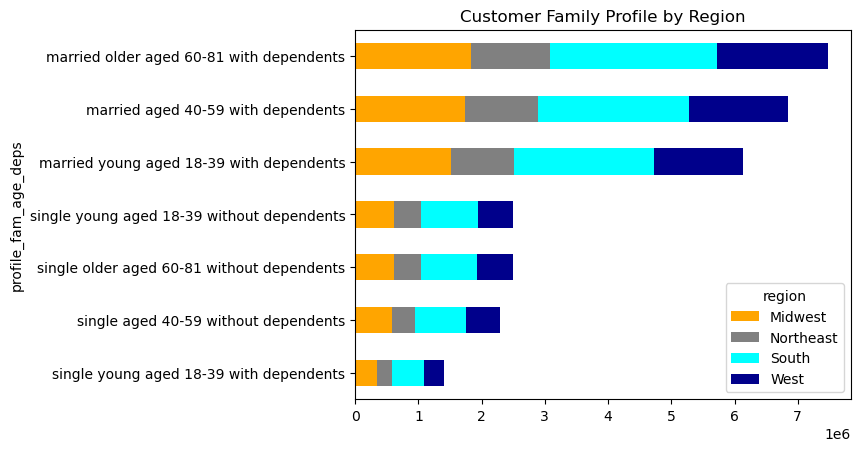

In [25]:
#Creating the visual, a bar chart
final_profile_regions = final_profile_regions.plot.barh(stacked = True, title = 'Customer Family Profile by Region', color = ['orange', 'gray', 'cyan','darkblue'])

In [26]:
#Exporting and saving it to IC folder
final_profile_regions.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'customer_family_profile_by_region.png'))

Proportional customer behaviour is seen throughout all the regions with married with dependents of all ages are the lead customer profile, followed by single without dependents customers of all ages. The youngest with dependents customers are last.  

In [27]:
#Checking family status and regions 
final_customer.groupby(['profile_fam_age_deps', 'region']).size().unstack(fill_value=0)

region,Midwest,Northeast,South,West
profile_fam_age_deps,,,,
married aged 40-59 with dependents,1734704,1161657,2384556,1564909
married older aged 60-81 with dependents,1839636,1239974,2646556,1745497
married young aged 18-39 with dependents,1517188,1002469,2199093,1417165
single aged 40-59 without dependents,590388,361439,799857,539725
single older aged 60-81 without dependents,617713,429454,878028,566448
single young aged 18-39 with dependents,351692,236556,505905,316983
single young aged 18-39 without dependents,616386,419236,906467,559543


In [28]:
#Creating a crosstab
crosstab = pd.crosstab(final_customer['profile_fam_age_deps'], final_customer['region'], dropna = False)

In [29]:
#Creating a clipboard to paste into Excel 
crosstab.to_clipboard()

In [30]:
#Grouping by profile income and region
final_profile_income_regions=final_customer.groupby(['profile_income', 'region']).size().unstack()

In [31]:
#Sorting 
final_profile_income_regions=final_profile_income_regions.loc[final_profile_income_regions.sum(axis=1).sort_values(ascending=True).index]

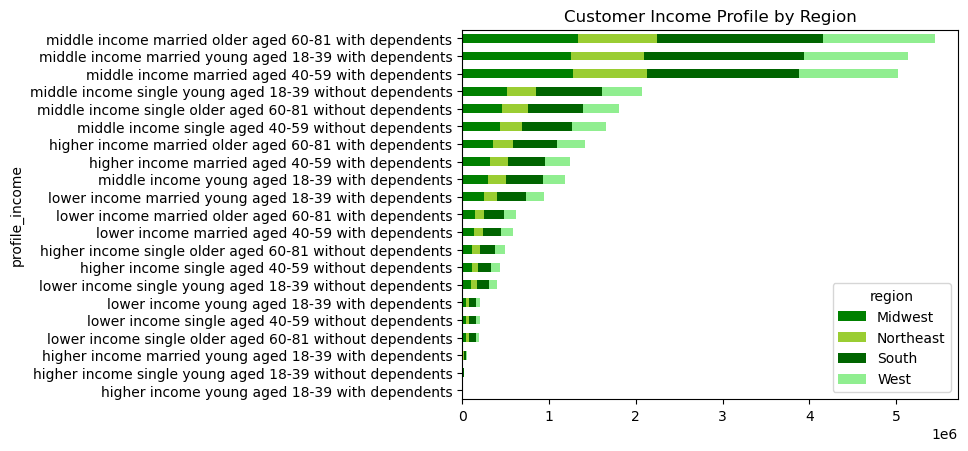

In [32]:
#Creating the visual, a bar chart
final_profile_income_regions = final_profile_income_regions.plot.barh(stacked = True, title = 'Customer Income Profile by Region', color = ['green', 'yellowgreen', 'darkgreen','lightgreen'])

In [33]:
#Exporting and saving it to IC folder
final_profile_income_regions.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'customer_income_profile_by_region.png'))

In [34]:
#Checking family status and regions 
final_customer.groupby(['profile_income', 'region']).size().unstack(fill_value=0)

region,Midwest,Northeast,South,West
profile_income,,,,
higher income married aged 40-59 with dependents,318583,208958,422933,286774
higher income married older aged 60-81 with dependents,353303,229522,508146,323425
higher income married young aged 18-39 with dependents,14617,9114,20062,13594
higher income single aged 40-59 without dependents,109017,67815,152822,104474
higher income single older aged 60-81 without dependents,113228,88400,171228,117457
higher income single young aged 18-39 without dependents,7092,4562,8386,3453
higher income young aged 18-39 with dependents,2447,774,8052,3519
lower income married aged 40-59 with dependents,140825,97941,208717,143818
lower income married older aged 60-81 with dependents,148198,105676,226613,134305


In [35]:
#Creating a crosstab
crosstab = pd.crosstab(final_customer['profile_income'], final_customer['region'], dropna = False)

In [36]:
#Creating a clipboard to paste into Excel 
crosstab.to_clipboard()

In [37]:
#Creating customer profile family buying bheaviour by depts
final_profile_depts_family = final_customer.groupby(['department', 'profile_fam_age_deps']).size().unstack()

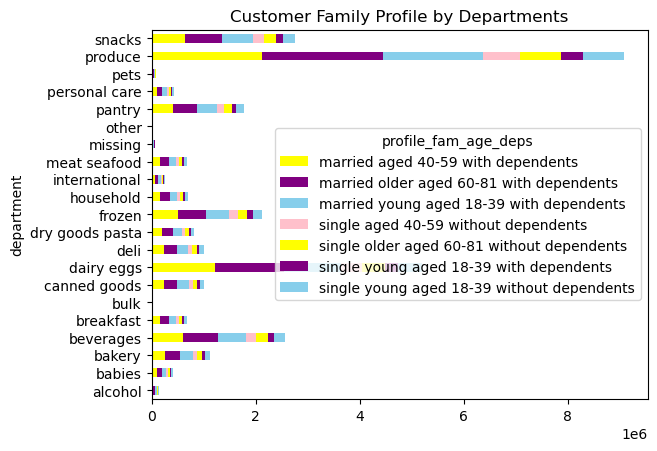

In [38]:
#Creating the visual, a bar chart
final_profile_depts_family = final_profile_depts_family.plot.barh(stacked = True, title = 'Customer Family Profile by Departments', color = ['yellow', 'purple', 'skyblue', 'pink'])

The visualization displays what makes sense, as age increases with adults with dependents, so does buying habits, they buy more products, as they make up most of the population. Further, 75 % of IC customers have dependents, and as a result families dominate the market. 

Produce, dairy eggs and snacks can be seen as the TOP 3 products purchased by these family groups.  

In [39]:
#Exporting and saving it to IC folder
final_profile_depts_family.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'customer_family_profile_by_dept.png'))

In [40]:
#Checking family status and regions 
final_customer.groupby(['department', 'profile_fam_age_deps']).size().unstack(fill_value=0)

profile_fam_age_deps,married aged 40-59 with dependents,married older aged 60-81 with dependents,married young aged 18-39 with dependents,single aged 40-59 without dependents,single older aged 60-81 without dependents,single young aged 18-39 with dependents,single young aged 18-39 without dependents
department,,,,,,,
alcohol,33026,35752,30664,12356,11878,8380,12618
babies,97545,104387,85751,32653,34351,19381,36324
bakery,264965,287607,236058,89008,96044,53910,97434
beverages,611473,662799,533205,202598,220881,119108,221870
breakfast,159833,172966,143477,53607,57239,33494,57479
bulk,7869,8748,7201,2534,2676,1633,2790
canned goods,238592,260179,213806,79319,84268,48477,87433
dairy eggs,1218889,1323670,1100026,406994,443989,251028,447232
deli,234903,256586,210844,79751,86749,48119,86882


In [41]:
#Creating a crosstab
crosstab = pd.crosstab(final_customer['department'], final_customer['profile_fam_age_deps'], dropna = False)

In [42]:
#Creating a clipboard to paste into Excel 
crosstab.to_clipboard()

# Creating visuals for customer profiles by busiest and hour of days orders  

In [43]:
# Checking df columns to look into customer profile purchases
final_customer.columns

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_previous_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', '_merge', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'avg_price', 'spending_flag', 'median_previous_order',
       'order_frequency_flag', 'gender', 'state', 'age', 'date_joined',
       'n_dependants', 'fam_status', 'income', 'region', 'Customer_Activity',
       'exclusion_flag', 'department', 'age_group', 'dependents_group',
       'income_group', 'profile_fam_age_deps', 'profile_income',
       'busiest_period_week', 'busiest_period_day'],
      dtype='object')

In [44]:
#Checking customer profile behaviour during days of the week
final_profile_orders_dow = final_customer.groupby(['profile_fam_age_deps', 'busiest_period_week']).size().unstack()

In [45]:
#Sorting
final_profile_orders_dow = final_profile_orders_dow.loc[final_profile_orders_dow.sum(axis=1).sort_values(ascending=True).index]

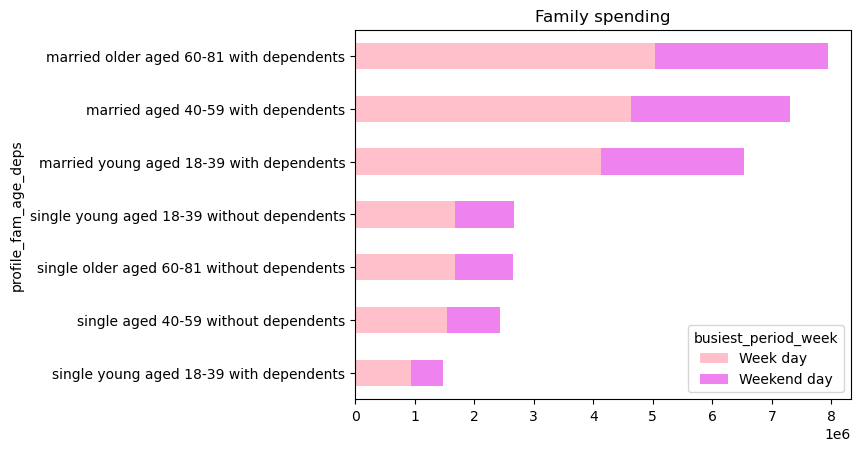

In [46]:
#Creating the visual, a bar chart
final_profile_orders_dow = final_profile_orders_dow.plot.barh(stacked = True, title = 'Family spending', color = ['pink', 'violet'])

In [47]:
#checking the spendiong figures
final_customer['busiest_period_week'].value_counts(dropna=False)


busiest_period_week
Week day       19661808
Weekend day    11330856
Name: count, dtype: int64

Depending on how you analyze the results, weekends are the busiest days, however that accounts for only 2 out of 7 days. As a result, during the week, a 5 day period , about 75% of the overall spending takes place. Taking a look at individual weekdays, an average of approximately 15% of spending occurs, however, the actual "busiest" are on the weekends where there is an increase in spending of 5%, to almost 20% on Saturdays and Sundays.  

In [48]:
# Exporting and saving to IC folder
final_profile_orders_dow.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'Family Spending by Days of the Week.png'))

In [49]:
#Checking customer profile behaviour during hours of the day
final_profile_orders_hours = final_customer.groupby(['profile_fam_age_deps', 'busiest_period_day']).size().unstack()

In [50]:
#Sorting
final_profile_orders_hours = final_profile_orders_hours.loc[final_profile_orders_hours.sum(axis=1).sort_values(ascending=True).index]

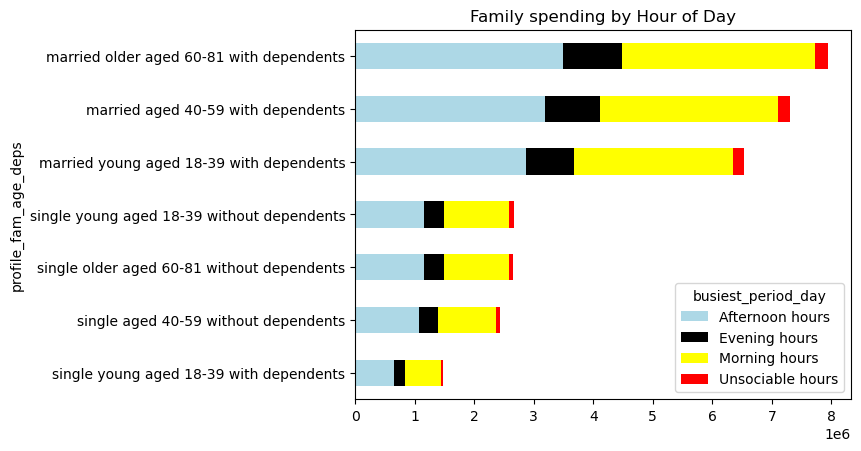

In [51]:
#Creating the visual, a bar chart
final_profile_orders_hours = final_profile_orders_hours.plot.barh(stacked = True, title = 'Family spending by Hour of Day', color = ['lightblue', 'black', 'yellow', 'red'])

In [52]:
# Exporting and saving to IC folder
final_profile_orders_hours.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'Family Spending by Hour of Day.png'))

# 10. Tidy up your script, export your final data set, and save your notebook.¶